#### From SpringBoard Blog

In [223]:
import os
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.graph_objs import *

###### Links to the raw files for Covid-19 dataset provided by CSSEGIS JHU

In [224]:
confirmed_cases_file_link = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_cases_file_link = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_cases_file_link = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
country_cases_file_link = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv'

In [225]:
#loading Dataset (https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)
confirmed_df = pd.read_csv(confirmed_cases_file_link)
deaths_df = pd.read_csv(deaths_cases_file_link)
recovered_df = pd.read_csv(recovered_cases_file_link)
cases_country_df = pd.read_csv(country_cases_file_link)

print(confirmed_df.shape , '|' , deaths_df.shape , '|', recovered_df.shape , '|', cases_country_df.shape )

(266, 136) | (266, 136) | (253, 136) | (188, 14)


In [122]:
#columns in 'confirmed_df' dataframe
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/22/20', '5/23/20', '5/24/20', '5/25/20', '5/26/20', '5/27/20',
       '5/28/20', '5/29/20', '5/30/20', '5/31/20'],
      dtype='object', length=135)

In [123]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,981,989,998,1004,1029,1050,1076,1099,1122,1137
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,762,762,762,763,763,763,763,764,764,764
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,60,61,69,70,70,71,74,81,84,86


In [124]:
confirmed_df[confirmed_df['Country/Region']=='Australia']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,107,107,107,107,107,107,107,107,107,107
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,3086,3087,3090,3092,3089,3090,3092,3092,3095,3098
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,29,29,29,29,29,29,29,29,29,29
11,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,1060,1061,1056,1057,1058,1058,1058,1058,1058,1058
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,439,439,439,439,440,440,440,440,440,440
13,Tasmania,Australia,-41.4545,145.9707,0,0,0,0,0,0,...,228,228,228,228,228,228,228,228,228,228
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,1593,1603,1605,1610,1618,1628,1634,1645,1649,1653
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,557,560,560,564,570,570,577,585,586,589


In [125]:
confirmed_df[confirmed_df['Country/Region']=='India']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
131,NaN,India,21.0,78.0,0,0,0,0,0,0,...,124794,131423,138536,144950,150793,158086,165386,173491,181827,190609


In [126]:
confirmed_df['Country/Region'].nunique()

188

In [127]:
#columns in 'cases_country_df' dataframe
cases_country_df.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'],
      dtype='object')

In [128]:
cases_country_df.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-06-01 10:32:46,-25.0000,133.0000,7204.0,103.0,6619.0,482.0,28.295699,NaN,NaN,1.429761,36,AUS
1,Austria,2020-06-01 10:32:46,47.5162,14.5501,16731.0,668.0,15593.0,470.0,185.767898,NaN,NaN,3.992589,40,AUT
2,Canada,2020-06-01 10:32:46,60.0010,-95.0010,92479.0,7374.0,49213.0,35892.0,244.293449,NaN,NaN,7.973702,124,CAN
3,China,2020-06-01 10:32:46,30.5928,114.3055,84147.0,4638.0,79389.0,120.0,5.990490,NaN,NaN,5.511783,156,CHN
4,Denmark,2020-06-01 10:32:46,56.2639,9.5018,11869.0,574.0,10560.0,735.0,204.913398,NaN,NaN,4.836128,208,DNK


In [129]:
cases_country_df.isna().sum()

Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Incident_Rate            2
People_Tested          188
People_Hospitalized    188
Mortality_Rate           0
UID                      0
ISO3                     2
dtype: int64

### EDA

In [130]:
global_data = cases_country_df.copy().drop(['Lat','Long_','Country_Region','Last_Update'], axis = 1)
global_summary = pd.DataFrame(global_data.sum()).T
global_summary.style.format("{:,.0f}")

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID
0,"6,189,560","372,469","2,652,477","3,217,306","24,746",0,0,672,"97,529"


###### For Chart 1 : Total Confirmed Covid-19 Cases (Globally)

In [131]:
confirmed_ts = confirmed_df.copy().drop(['Lat','Long','Country/Region','Province/State'],axis = 1)
confirmed_ts_summary = confirmed_ts.sum()

In [132]:
cases_country_df[cases_country_df['Country_Region'] == 'India']

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
92,India,2020-06-01 10:32:46,20.593684,78.96288,191041.0,5413.0,91907.0,93721.0,13.843507,NaN,NaN,2.833423,356,IND


In [133]:
confirmed_ts_summary

1/22/20        555
1/23/20        654
1/24/20        941
1/25/20       1434
1/26/20       2118
            ...   
5/27/20    5691790
5/28/20    5808946
5/29/20    5924275
5/30/20    6059017
5/31/20    6166946
Length: 131, dtype: int64

In [134]:
fig_1 = go.Figure(data = go.Scatter(x = confirmed_ts_summary.index,y = confirmed_ts_summary.values, mode = 'lines+markers'))

fig_1.update_layout(title = 'Total Confirmed Covid-19 Cases (Globally)', yaxis_title = 'Confirmed cases', xaxis_tickangle = 315, plot_bgcolor='rgba(0,0,0,0)')

fig_1.show()

###### Defining a template plot function and color array

In [135]:
# Initializing color Array to be used access the analysis
color_arr = px.colors.qualitative.Dark24

In [256]:
def draw_plot(ts_array, ts_label, title, colors, mode_size, line_size, x_axis_title, y_axis_title, tickangle = 0, yaxis_type='', additional_annotations=[]):
    #Initialize figure
    fig = go.Figure()
    #add all traces
    for index,ts in enumerate(ts_array):
        fig.add_traces(go.Scatter(x = ts.index,
                                  y = ts.values,
                                  name = ts_label[index],
                                  line = dict(color = colors[index],width = line_size[index]),connectgaps=True))
    #base x_axis prop.
    x_axis_dict = dict(showline = True,
                     showgrid = True,
                     showticklabels = True,
                     linecolor = 'rgb(204, 204, 204)',
                     linewidth = 2,
                     ticks = 'outside',
                     tickfont = dict(family = 'Arial',size = 12, color = 'rgb(82,82,82)'))
    #setting x_axis params
    if x_axis_title:
        x_axis_dict['title'] = x_axis_title
        
    if tickangle >0:
        x_axis_dict['tickangle'] = tickangle
        
    #base y_axis prop.
    y_axis_dict = dict(showline = True,
                     showgrid = True,
                     showticklabels = True,
                     linecolor = 'rgb(204, 204, 204)',
                     linewidth = 2)
    #setting my_axis params
    if yaxis_type != '':
        y_axis_dict['type'] = yaxis_type
        
    if y_axis_title:
        y_axis_dict['title'] = y_axis_title
    
    #updating the layout
    fig.update_layout(xaxis = x_axis_dict,
                     yaxis = y_axis_dict,
                     autosize = True,
                     margin = dict(autoexpand=True,l=100,r=20,t=110),
                     showlegend = True,
                     plot_bgcolor = 'rgba(0,0,0,0)',
                    legend=dict(x=0, y=1)
                     )
    
    #base annotations for any graph
    annotations = []
    #Title
    annotations.append(dict(xref='paper',yref='paper',x=0.0,y=1.05,xanchor='left',yanchor='bottom',
                           text = title,
                           font=dict(family = 'Arial',size = 16, color = 'rgb(37,37,37)'),showarrow=False))
    
    #adding annotations in params
    if len(additional_annotations) > 0:
        annotations.append(additional_annotations)
        
    #updating the layout
    fig.update_layout(annotations=annotations)
    
    return fig

###### For Chart 2 : Covid-19 Case Status

In [226]:
confirmed_agg_ts = confirmed_df.copy().drop(['Lat','Long','Country/Region','Province/State'],axis = 1).sum()
death_agg_ts = deaths_df.copy().drop(['Lat','Long','Country/Region','Province/State'],axis = 1).sum()
recovered_agg_ts = recovered_df.copy().drop(['Lat','Long','Country/Region','Province/State'],axis = 1).sum()

#There is no time series dat for the active cases,therefore it needs to be engineered seperately
active_agg_ts = pd.Series(data = np.array([x1-x2-x3 for (x1, x2, x3) in zip(confirmed_agg_ts.values, death_agg_ts.values, recovered_agg_ts.values )]), index = confirmed_agg_ts.index)

#Plot and add traces for all the aggregated timeseries

In [190]:
ts_array = [confirmed_agg_ts, active_agg_ts, recovered_agg_ts, death_agg_ts]
labels = ['Confirmed', 'Active','Recovered','Deaths']
colors = [color_arr[0],color_arr[1],color_arr[2],color_arr[3]]
mode_size = [8,8,12,8]
line_size = [2,2,4,2]

#calling the draw.plot function defined above
fig_2 = draw_plot(ts_array = ts_array,
                 ts_label = labels,
                 title = '',
                 colors = colors, mode_size = mode_size,
                 line_size = line_size,
                 x_axis_title = 'Date',
                 y_axis_title = 'Case Count',
                 tickangle = 315,
                 yaxis_type = '',additional_annotations =[])

fig_2.show()

In [227]:
a = pd.DataFrame(confirmed_agg_ts).rename(columns = {0:'Confirmed'}).reset_index().rename(columns = {'index':'Date'})
b = pd.DataFrame(active_agg_ts).rename(columns = {0:'Active'}).reset_index().rename(columns = {'index':'Date'})
c = pd.DataFrame(recovered_agg_ts).rename(columns = {0:'Recovered'}).reset_index().rename(columns = {'index':'Date'})
d = pd.DataFrame(death_agg_ts).rename(columns = {0:'Deaths'}).reset_index().rename(columns = {'index':'Date'})
df = a.merge(b, on='Date', how = 'left')
df = df.merge(c,on='Date', how = 'left')
df = df.merge(d,on='Date', how = 'left')
df

,Date,Confirmed,Active,Recovered,Deaths
0,1/22/20,555,510,28,17
1,1/23/20,654,606,30,18
2,1/24/20,941,879,36,26
3,1/25/20,1434,1353,39,42
4,1/26/20,2118,2010,52,56
...,...,...,...,...,...
127,5/28/20,5808946,3032678,2415960,360308
128,5/29/20,5930781,3072248,2493535,364998
129,5/30/20,6059017,3125198,2564693,369126
130,5/31/20,6166946,3153582,2641329,372035


In [217]:
a

,index,Confirmed
0,1/22/20,555
1,1/23/20,654
2,1/24/20,941
3,1/25/20,1434
4,1/26/20,2118
...,...,...
126,5/27/20,5691790
127,5/28/20,5808946
128,5/29/20,5924275
129,5/30/20,6059017


In [236]:
a = pd.DataFrame(confirmed_agg_ts).rename(columns = {0:'Confirmed'}).reset_index().rename(columns = {'index':'Date'})
b = pd.DataFrame(active_agg_ts).rename(columns = {0:'Active'}).reset_index().rename(columns = {'index':'Date'})
c = pd.DataFrame(recovered_agg_ts).rename(columns = {0:'Recovered'}).reset_index().rename(columns = {'index':'Date'})
d = pd.DataFrame(death_agg_ts).rename(columns = {0:'Deaths'}).reset_index().rename(columns = {'index':'Date'})
df = a.merge(b, on='Date', how = 'left')
df = df.merge(c,on='Date', how = 'left')
df = df.merge(d,on='Date', how = 'left')
df.index = df.Date
df = df.drop(columns = 'Date')

#display
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df.index.tolist(), y=df['Deaths'],
    hoverinfo='x+y',
    mode='lines+markers',
     line_color='red',
    stackgroup='one',
    name = "Deaths (Total = 375559)"
))

fig.add_trace(go.Scatter(x=df.index.tolist(), y=df['Recovered'],
    hoverinfo='x+y',
    mode='lines+markers',
    line_color='green',
    stackgroup='one',
    name = "Recovered (Total = 2696009)"
))
fig.add_trace(go.Scatter( x=df.index.tolist(), y=df['Confirmed'],
    hoverinfo='x+y',
    mode='lines+markers',
    line_color='grey',
    stackgroup='one',
    name ="Confirmed (Total = 6266192)"
))
fig.update_layout(template = 'plotly_white',yaxis=dict(title='Number of cases' ),xaxis=(dict(title='Date (1/22/20 - 6/1/20)', showticklabels=False)), legend=dict(x=0, y=1))
fig.show()

In [40]:
# source : https://commons.wikipedia.org/wiki/File:COVID-19_India_Total_Cases_Animated_Map.gif
from IPython.display import HTML
HTML('<img src="https://upload.wikimedia.org/wikipedia/commons/9/95/COVID-19_India_Total_Cases_Animated_Map.gif" height ="600" width="400">')

###### For Country Level Drill Down

In [200]:
cases_country_df.copy().drop(['Lat','Long_','Last_Update','People_Tested','People_Hospitalized'],axis=1).sort_values('Confirmed',ascending = False).reset_index(drop=True).style.bar(
align='left',width=98,color='orange')

In [199]:
cases_country_df.copy().drop(['Lat','Long_','Last_Update','People_Tested','People_Hospitalized'],axis=1).sort_values('Confirmed',ascending = False).reset_index(drop=True).head(10)

,Country_Region,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate,UID,ISO3
0,US,1811370.0,105165.0,458231.0,1302470.0,549.789187,5.805827,840,USA
1,Brazil,526447.0,29937.0,211080.0,285430.0,247.670523,5.686612,76,BRA
2,Russia,414328.0,4849.0,175514.0,233965.0,283.913751,1.170329,643,RUS
3,United Kingdom,277736.0,39127.0,1221.0,237388.0,409.121150,14.087839,826,GBR
4,Spain,239638.0,27127.0,150376.0,62135.0,512.542214,11.319991,724,ESP
5,Italy,233197.0,33475.0,158355.0,41367.0,385.692937,14.354816,380,ITA
6,India,198370.0,5608.0,95754.0,97008.0,14.374592,2.827040,356,IND
7,France,189348.0,28836.0,68558.0,91954.0,290.083978,15.229102,250,FRA
8,Germany,183594.0,8555.0,165632.0,9407.0,219.127901,4.659738,276,DEU
9,Peru,170039.0,4634.0,68507.0,96898.0,515.709675,2.725257,604,PER


In [201]:
cases_country_df.copy().drop(['Lat','Long_','Last_Update','People_Tested','People_Hospitalized'],axis=1).sort_values('Recovered',ascending = False).reset_index(drop=True).style.bar(
align='left',width=98,color='lightgreen')

In [202]:
cases_country_df.copy().drop(['Lat','Long_','Last_Update','People_Tested','People_Hospitalized'],axis=1).sort_values('Deaths',ascending = False).reset_index(drop=True).style.bar(
align='left',width=98,color='red')

In [203]:
cases_country_df.copy().drop(['Lat','Long_','Last_Update','People_Tested','People_Hospitalized'],axis=1).sort_values('Active',ascending = False).reset_index(drop=True).style.bar(
align='left',width=98,color='purple')

In [205]:
# for recovery rate
cases_country_df1 = cases_country_df.copy()
cases_country_df['%Recovered'] = cases_country_df['Recovered'] *100 / cases_country_df['Confirmed']

cases_country_df.copy().drop(['Lat','Long_','Last_Update','People_Tested','People_Hospitalized'],axis=1).sort_values('Confirmed',ascending = False).reset_index(drop=True).style.bar(
align='left',width=98,color='green')

In [145]:
# del cases_country_df['%Deaths']

In [206]:
((100*cases_country_df['Recovered'].sum())/cases_country_df['Confirmed'].sum()).round(2)

43.03

In [207]:
((100*cases_country_df['Deaths'].sum())/cases_country_df['Confirmed'].sum()).round(2)

5.99

In [ ]:
cases_country_df

#### Focus : India

###### For Chart 3: 'Covid-19 Case' Trend in India

In [237]:
confirmed_India_ts = confirmed_df[confirmed_df['Country/Region']=='India']
confirmed_India_ts = confirmed_India_ts.drop(['Lat','Long','Country/Region','Province/State'],axis = 1).reset_index(drop=True).sum()
confirmed_India_ts.index = pd.to_datetime(confirmed_India_ts.index)

deaths_India_ts = deaths_df[deaths_df['Country/Region']=='India']
deaths_India_ts = deaths_India_ts.drop(['Lat','Long','Country/Region','Province/State'],axis = 1).reset_index(drop=True).sum()
deaths_India_ts.index = pd.to_datetime(deaths_India_ts.index)

recovered_India_ts = recovered_df[recovered_df['Country/Region']=='India']
recovered_India_ts = recovered_India_ts.drop(['Lat','Long','Country/Region','Province/State'],axis = 1).reset_index(drop=True).sum()
recovered_India_ts.index = pd.to_datetime(recovered_India_ts.index)

active_India_ts = pd.Series(data = np.array([x1-x2-x3 for (x1, x2, x3) in zip(confirmed_India_ts.values, deaths_India_ts.values, recovered_India_ts.values )]), index = confirmed_India_ts.index)

In [238]:
ts_array = [confirmed_India_ts, active_India_ts, recovered_India_ts, deaths_India_ts]
labels = ['Confirmed', 'Active','Recovered','Deaths']
colors = [color_arr[0],color_arr[1],color_arr[2],color_arr[3]]
mode_size = [8,8,12,8]
line_size = [2,2,4,2]

#calling the draw.plot function defined above
fig_3 = draw_plot(ts_array = ts_array,
                 ts_label = labels,
                  title = '',
                 colors = colors, mode_size = mode_size,
                 line_size = line_size,
                 x_axis_title = 'Date',
                 y_axis_title = 'Case Count',
                 tickangle = 315,
                 yaxis_type = '',additional_annotations =[])

fig_3.show()

In [239]:
a = pd.DataFrame(confirmed_India_ts).rename(columns = {0:'Confirmed'}).reset_index().rename(columns = {'index':'Date'})
b = pd.DataFrame(active_India_ts).rename(columns = {0:'Active'}).reset_index().rename(columns = {'index':'Date'})
c = pd.DataFrame(recovered_India_ts).rename(columns = {0:'Recovered'}).reset_index().rename(columns = {'index':'Date'})
d = pd.DataFrame(deaths_India_ts).rename(columns = {0:'Deaths'}).reset_index().rename(columns = {'index':'Date'})
df = a.merge(b, on='Date', how = 'left')
df = df.merge(c,on='Date', how = 'left')
df = df.merge(d,on='Date', how = 'left')
df.index = df.Date
df = df.drop(columns = 'Date')
df

,Confirmed,Active,Recovered,Deaths
Date,,,,
2020-01-22,0,0,0,0
2020-01-23,0,0,0,0
2020-01-24,0,0,0,0
2020-01-25,0,0,0,0
2020-01-26,0,0,0,0
...,...,...,...,...
2020-05-28,165386,89755,70920,4711
2020-05-29,173491,85884,82627,4980
2020-05-30,181827,89706,86936,5185


In [240]:
a = pd.DataFrame(confirmed_agg_ts).rename(columns = {0:'Confirmed'}).reset_index().rename(columns = {'index':'Date'})
b = pd.DataFrame(active_agg_ts).rename(columns = {0:'Active'}).reset_index().rename(columns = {'index':'Date'})
c = pd.DataFrame(recovered_agg_ts).rename(columns = {0:'Recovered'}).reset_index().rename(columns = {'index':'Date'})
d = pd.DataFrame(death_agg_ts).rename(columns = {0:'Deaths'}).reset_index().rename(columns = {'index':'Date'})
df = a.merge(b, on='Date', how = 'left')
df = df.merge(c,on='Date', how = 'left')
df = df.merge(d,on='Date', how = 'left')
df.index = df.Date
df = df.drop(columns = 'Date')

#display
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df.index.tolist(), y=df['Deaths'],
    hoverinfo='x+y',
    mode='lines+markers',
     line_color='red',
    stackgroup='one',
    name = "Deaths (Total = 5608)"
))

fig.add_trace(go.Scatter(x=df.index.tolist(), y=df['Recovered'],
    hoverinfo='x+y',
    mode='lines+markers',
    line_color='green',
    stackgroup='one',
    name = "Recovered (Total = 95754)"
))
fig.add_trace(go.Scatter( x=df.index.tolist(), y=df['Confirmed'],
    hoverinfo='x+y',
    mode='lines+markers',
    line_color='grey',
    stackgroup='one',
    name ="Confirmed (Total = 198370)"
))
fig.update_layout(template = 'plotly_white',yaxis=dict(title='Number of cases' ),xaxis=(dict(title='Date (1/22/20 - 6/1/20)', showticklabels=False)), legend=dict(x=0, y=1))
fig.show()

In [189]:
(91852 - 57692)

34160

###### Chart 4 : Covid-19 Transmission Timeline in India - In different LockDown Phases

In [261]:
# Transmission Timeline in India in Different lockdown phases
# LockDown 1.O = '03/25/2020' - '04/14/2020'
# LockDown 2.O = '04/15/2020' - '05/03/2020'
# LockDown 3.O = '05/04/2020' - '05/17/2020'
# LockDown 4.O = '05/18/2020' - '05/31/2020'

def draw_plot1(ts_array, ts_label, title, colors, mode_size, line_size, x_axis_title, y_axis_title, tickangle = 0, yaxis_type='', additional_annotations=[]):
    #Initialize figure
    fig = go.Figure()
    #add all traces
    for index,ts in enumerate(ts_array):
        fig.add_traces(go.Scatter(x = ts.index,
                                  y = ts.values,
                                  name = ts_label[index],
                                  line = dict(color = colors[index],width = line_size[index]),connectgaps=True, mode = 'lines+markers'))
    #base x_axis prop.
    x_axis_dict = dict(showline = True,
                     showgrid = True,
                     showticklabels = True,
                     linecolor = 'rgb(204, 204, 204)',
                     linewidth = 2,
                     ticks = 'outside',
                     tickfont = dict(family = 'Arial',size = 12, color = 'rgb(82,82,82)'))
    #setting x_axis params
    if x_axis_title:
        x_axis_dict['title'] = x_axis_title
        
    if tickangle >0:
        x_axis_dict['tickangle'] = tickangle
        
    #base y_axis prop.
    y_axis_dict = dict(showline = True,
                     showgrid = True,
                     showticklabels = True,
                     linecolor = 'rgb(204, 204, 204)',
                     linewidth = 2)
    #setting my_axis params
    if yaxis_type != '':
        y_axis_dict['type'] = yaxis_type
        
    if y_axis_title:
        y_axis_dict['title'] = y_axis_title
    
    #updating the layout
    fig.update_layout(xaxis = x_axis_dict,
                     yaxis = y_axis_dict,
                     autosize = True,
                     margin = dict(autoexpand=True,l=100,r=20,t=110),
                     showlegend = True,
                     plot_bgcolor = 'rgba(0,0,0,0)',
                     legend=dict(x=0, y=1)
                     )
    
    #base annotations for any graph
    annotations = []
    #Title
    annotations.append(dict(xref='paper',yref='paper',x=0.0,y=1.05,xanchor='left',yanchor='bottom',
                           text = title,
                           font=dict(family = 'Arial',size = 16, color = 'rgb(37,37,37)'),showarrow=False))
    
    #adding annotations in params
    if len(additional_annotations) > 0:
        annotations.append(additional_annotations)
        
    #updating the layout
    fig.update_layout(annotations=annotations)
    
    return fig


Phase = 4

if Phase == 1:
    start_date = '2020-03-25'
    end_date = '2020-04-14'    
elif Phase == 2:
    start_date = '2020-04-15'
    end_date = '2020-05-03'
elif Phase == 3:
    start_date = '2020-05-04'
    end_date = '2020-05-17'
elif Phase == 4:
    start_date = '2020-05-18'
    end_date = '2020-05-31'


a = confirmed_India_ts[confirmed_India_ts.index >= start_date]
confirmed_India_ts1 = a[a.index <= end_date]
del a
a = active_India_ts[active_India_ts.index >= start_date]
active_India_ts1 = a[a.index <= end_date]
del a
a = recovered_India_ts[recovered_India_ts.index >= start_date]
recovered_India_ts1 = a[a.index <= end_date]
del a
a = deaths_India_ts[deaths_India_ts.index >= start_date]
deaths_India_ts1 = a[a.index <= end_date]
del a

# confirmed_India_ts1 = confirmed_India_ts.loc[(confirmed_India_ts[confirmed_India_ts.index >= start_date]) & (confirmed_India_ts[confirmed_India_ts.index <= end_date])]
# active_India_ts1 = active_India_ts.loc[(active_India_ts[active_India_ts.index >= start_date]) & (active_India_ts[active_India_ts.index <= end_date])]
# recovered_India_ts1 = recovered_India_ts.loc[(recovered_India_ts[recovered_India_ts.index >= start_date]) & (recovered_India_ts[recovered_India_ts.index <= end_date])]
# deaths_India_ts1 = deaths_India_ts.loc[(deaths_India_ts[deaths_India_ts.index >= start_date]) & (deaths_India_ts[deaths_India_ts.index <= end_date])]
line_size = [2,2,2,2]
ts_array1 = [confirmed_India_ts1, active_India_ts1, recovered_India_ts1, deaths_India_ts1]
fig_4 = draw_plot1(ts_array = ts_array1,
                 ts_label = labels,
                  title = '',
                 colors = colors, mode_size = mode_size,
                 line_size = line_size,
                 x_axis_title = 'Date',
                 y_axis_title = 'Case Count',
                 tickangle = 315,
                 yaxis_type = '',additional_annotations =[])

fig_4.show()

###### Chart 5 : Covid-19 Transmission in India (Semi-Log Plot)

In [257]:
mode_size = [8,8,12,8]
line_size = [4,2,2,2]

fig_5 = draw_plot(ts_array = ts_array,
                 ts_label = labels,
                  title = '',
                 colors = colors, mode_size = mode_size,
                 line_size = line_size,
                 x_axis_title = 'Date',
                 y_axis_title = 'Case Count',
                 tickangle = 315,
                 yaxis_type = 'log',additional_annotations =[])

fig_5.show()

#### Modelling & Prediction

###### SIR Model for Spread of Disease -- The Differential equation Model

In [155]:
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime

In [167]:
START_DATE = {
#     'Italy' : '1/31/20',
    'India' : '1/30/20' 
}
class Learner(object):
    def __init__(self,country,loss,start_date = '1/22/20', predict_range = 366, s_O = 1000000, i_O = 2, r_O = 10):
        self.country = country
        self.loss = loss
        self.start_date = start_date
        self.predict_range = predict_range
        self.s_O = s_O
        self.i_O = i_O
        self.r_O = r_O
        
    def load_confirmed(self, country):
        df = pd.read_csv(confirmed_cases_file_link)
        df= df.drop(['Province/State'],axis = 1)
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]
    
    def load_recovered(self, country):
        df = pd.read_csv(recovered_cases_file_link)
        df= df.drop(['Province/State'],axis = 1)
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]

    def load_deaths(self, country):
        df = pd.read_csv(deaths_cases_file_link)
        df= df.drop(['Province/State'],axis = 1)
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]
    
    def extend_index(self, index, new_size):
        values = index.values
        current = datetime.strptime(index[-1], '%m/%d/%y')
        while len(values) < new_size:
            current = current + timedelta(days=1)
            values = np.append(values, datetime.strftime(current, '%m/%d/%y'))
        return values
    
    def predict(self, beta, gamma, data, recovered, death, country, s_O, i_O, r_O):
        
        new_index = self.extend_index(data.index, self.predict_range)
        size = len(new_index)
        def SIR(t, y):
            S= y[0]
            I = y[1]
            R = y[2]
            return [-beta*S*I , beta*S*I-gamma*I , gamma*I]
        extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
        extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
        extended_death = np.concatenate((death.values, [None] * (size - len(death.values))))
        return new_index, extended_actual, extended_recovered, extended_death, solve_ivp(SIR, [0,size], [s_O, i_O, r_O], t_eval = np.arange(0,size,1))
    
    def train(self):
        recovered = self.load_recovered(self.country)
        death = self.load_deaths(self.country)
        data = (self.load_confirmed(self.country) - recovered - death)
        
        optimal = minimize(loss, [0.001,0.001], args=(data, recovered, self.s_O, self.i_O, self.r_O), method = 'L-BFGS-B', bounds = [(0.00000001,0.4), (0.00000001,0.4)])
        print(optimal)
        beta, gamma = optimal.x
        new_index, extended_actual, extended_recovered, extended_death, prediction = self.predict(beta, gamma, data, recovered, death, self.country, self.s_O, self.i_O, self.r_O)
        df= pd.DataFrame({'Infected data' : extended_death, 'Recovered data' : extended_recovered, 'Death data' : extended_death, 'Susceptible' : prediction.y[0], 'Infected' : prediction.y[1], 'Recovered' : prediction.y[2]}, index = new_index)
        #save results to csv
        df.to_csv(f"{self.country}.csv")
        fig, ax = plt.subplots(figsize=(15,10))
        ax.set_title(self.country)
        df.plot(ax=ax)
        print(f"country={self.country}, beta = {beta:.8f}, gamma = {gamma:.8f}, r_O:{(beta/gamma):.8f}")
        fig.savefig(f"{self.country}.png")
        
        return df, fig

In [168]:
def loss(point, data, recovered, s_O, i_O, r_O):
    size = len(data)
    beta, gamma = point
    def SIR(t,y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I , beta*S*I-gamma*I , gamma*I]
    solution = solve_ivp(SIR, [0,size], [s_O,i_O,r_O], t_eval = np.arange(0,size,1), vectorized = True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - data)**2))
    alpha = 0.1
    return alpha*l1 + (1-alpha)*l2

###### For Italy

In [ ]:
# italy_learner = Learner(country = 'Italy', loss = loss)

In [ ]:
# italy_df, italy_fig = italy_learner.train()

###### For India

In [169]:
india_learner = Learner(country='India', loss = loss, i_O = 3)
#as there were only 3 in february

      fun: 28368.66991705381
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.50816273e+11, -3.24216191e+04])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 360
      nit: 14
   status: 2
  success: False
        x: array([8.01843117e-08, 7.92455870e-04])
country=India, beta = 0.00000008, gamma = 0.00079246, r_O:0.00010118


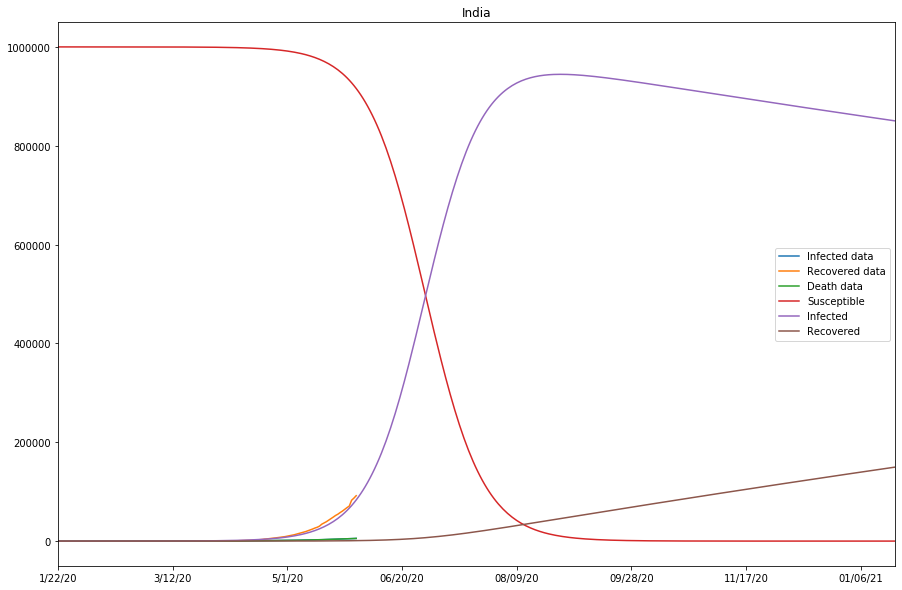

In [170]:
india_df, india_fig = india_learner.train()

###### Loading the saved results from the SIR model

In [171]:
india_sir = pd.read_csv('/Users/apple/India.csv')

In [172]:
india_sir = india_sir.rename(columns = {'Unnamed: 0':'Datetime'})
india_sir.index = india_sir.Datetime
india_sir = india_sir.drop(columns = ['Datetime'])
india_sir.head()

,Infected data,Recovered data,Death data,Susceptible,Infected,Recovered
Datetime,,,,,,
1/22/20,0.0,0.0,0.0,1000000.000000,3.000000,10.000000
1/23/20,0.0,0.0,0.0,999999.749640,3.247885,10.002474
1/24/20,0.0,0.0,0.0,999999.478594,3.516253,10.005153
1/25/20,0.0,0.0,0.0,999999.185056,3.806890,10.008054
1/26/20,0.0,0.0,0.0,999998.867201,4.121604,10.011195


In [183]:
def plot_sir_prediction(title, df_sir, remove_series=[], yaxis_type='',yaxis_title=''):
    fig = go.Figure()
    title = title
    labels = ['Infected data','Recovered data','Death data','Susceptible','Infected','Recovered']
    colors = [color_arr[0], color_arr[9], color_arr[3], color_arr[8], color_arr[10], color_arr[13]]
    line_size = [2,2,2,2,2,2]
    
    for index, data_series in enumerate(labels):
        if data_series not in remove_series:
            fig.add_trace(go.Scatter(x = df_sir.index,
                                    y = df_sir[data_series],
                                    name = labels[index],
                                    line = dict(color = colors[index],
                                               width = line_size[index]),
                                    connectgaps = True))
    xaxis = dict( title = 'Date', 
                 showline = True,
                 showgrid = True,
                 showticklabels = True,
                 linecolor = 'rgb(204, 204, 204)',
                 linewidth = 2,
                 ticks = 'outside',
                 tickangle = 280,
                 tickfont = dict(family = 'Arial',size = 12, color = 'rgb(82,82,82)'))
    yaxis = dict(title = "Case Count",
                    showline = True,
                     showgrid = True,
                     showticklabels = True,
                     linecolor = 'rgb(204, 204, 204)',
                     linewidth = 2)
    if yaxis_type != '':
        yaxis['type'] = yaxis_type
        
    if yaxis_title:
        yaxis['title'] = yaxis_title

    fig.update_layout(xaxis = xaxis,
                     yaxis = yaxis,
                     autosize = True,
                     margin = dict(autoexpand=True,l=100,r=20,t=110),
                     showlegend = True
                     )
    annotations = []
    #Title
    annotations.append(dict(xref='paper',yref='paper',x=0.0,y=1.05,xanchor='left',yanchor='bottom',
                           text = title,
                           font=dict(family = 'Arial',size = 16, color = 'rgb(37,37,37)'),showarrow=False))
    fig.update_layout(annotations=annotations, plot_bgcolor='rgba(0,0,0,0)')
    
    return fig

###### For Chart 6 : SIR Model -- Covid-19 Transmission -- Prediction -- INDIA

In [184]:
fig_6 = plot_sir_prediction(title = 'SIR Model -- Covid-19 Transmission -- Prediction -- INDIA', df_sir = india_sir)
fig_6.show()